# Sample assessment test questions

This notebook is an extended version of __[this work](https://github.com/murogrande/IBM-cert-exam-study-questions)__ on some relevant questions for the exam. Each of the question is discussed in more detail and each of the answers is justified by a related code run. Also, alternative answers are provided.

__Note__

Some questions from the original source did not come with multiple choice options, just the starting question. To account for that, I will first give the answer, and then built it from the ground up.

Before proceeding with the questions, we import some of the tools that we will need for our code:

In [145]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, BasicAer, IBMQ
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from math import sqrt

## Questions

### 1. Which code fragment, when run immediately after the code below, will save the following PNG image to disk?

In [3]:
qc = QuantumCircuit(2)
qc.cx(0,1)

# insert code here

- A. `qc.draw('circuit_drawing.png')`
- B. `qc.write_drawing(format='png', name ='circuit_drawing')`
- C. `qc.draw('latex', filename ='circuit_drawing.png')`
- D. `qc.draw('mpl', filename ='circuit_drawing.png')`

---

The answer is __D__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html)__, the `.draw()` method is defined as

```
    QuantumCircuit.draw(output=None, scale=None, filename=None, style=None, interactive=False, plot_barriers=True, reverse_bits=False, justify=None, vertical_compression='medium', idle_wires=True, with_layout=True, fold=None, ax=None, initial_state=False, cregbundle=None, wire_order=None)
```

where the first parameter, `output`, has the description:

```
    output (str) – select the output method to use for drawing the circuit. Valid choices are text, mpl, latex, latex_source. By default the text drawer is used unless the user config file (usually ~/.qiskit/settings.conf) has an alternative backend set as the default. For example, circuit_drawer = latex. If the output kwarg is set, that backend will always be used over the default in the user config file.
```

whereas for `filename`:

```
    filename (str) – file path to save image to. Defaults to None.
```

If we run the code we will see that the PNG version of the image gets stored to the specified path.

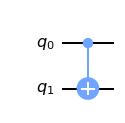

In [5]:
qc.draw('mpl', filename='./imgs/question1.png')

---
---

### 2. Which of the count results would be expected from this circuit? 

In [6]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.x(1)
qc.measure([0,1],[0,1])

- A. `{'01': 503, '10':521}`
- B. `{'00': 503, '11':521}`
- C. `{'10': 503, '11':521}`
- D. `{'00': 503, '01':521}`

---

The answer is __C__. The defined circuit looks like

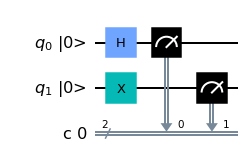

In [8]:
qc.draw('mpl', initial_state=True)

Where just right before measurement the state of the system is

$$ (X\otimes H)|q_1 q_0\rangle = X|q_1\rangle \otimes H|q_0\rangle $$

Since the specified operations are applied to single qubits, we expect a result where $|q_1\rangle$ is measured as $|1\rangle$ with probability $1$ as

$$ X|q_1\rangle = X|0\rangle = |1\rangle $$

while $|q_0\rangle$, having been put in a uniform superposition by the Hadamard gate, has $\tfrac{1}{2}$ probability of being measured in both the $|0\rangle$ and $|1\rangle$ states.

According to Qiskit's qubit ordering, the measured output string is such that the least significant digit corresponds to the measurement of the $0$-th qubit, meaning that combining the above considerations results in the equally probable outputs `10` and `11`.

We can verify this by checking the counts on the simulator:

In [10]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, sim).result()
counts = result.get_counts()

print(f'counts: {counts}')

counts: {'10': 524, '11': 500}


---
---

### 3. Given the code fragment below, what correctly displays the result for the two quantum registers?

In [11]:
qreg_a = QuantumRegister(2)
qreg_b = QuantumRegister(2)
creg = ClassicalRegister(4)
qc = QuantumCircuit(qreg_a,qreg_b,creg)

qc.x(qreg_a[0])
qc.measure(qreg_a,creg[0:2])
qc.measure(qreg_b,creg[2:4])

- A. `{'00 01': 1024}`
- B. `{'01 00': 1024}`
- C. `{'0001': 1024}`
- D. `{'0100': 1024}`

---

The answer is __C__. The defined circuit is

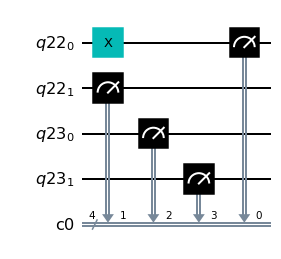

In [13]:
qc.draw('mpl')

As mentioned in the previous question, following Qiskit's bit ordering rule, the $0$-th qubit, the only one whose starting $|0\rangle$ state gets transformed into $|1\rangle$ by the $X$-gate, has its output written in the least significant bit of the measured bitstring.

With the simulator:

In [12]:
result = execute(qc, sim).result()
counts = result.get_counts(qc)
print(f'counts: {counts}')

counts: {'0001': 1024}


---
---

### 4. Which line of code, if run directly after the code below, would raise an error?

In [14]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

- A. `qc.draw('text')`
- B. `qc.draw('mpl')`
- C. `qc.draw('png')`
- D. `qc.draw('latex_source')`

---

The answer is __C__. Again, from the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html)__, the first parameter of the `.draw()` method, `output` is described as

```
output (str) – select the output method to use for drawing the circuit. Valid choices are text, mpl, latex, latex_source. By default the text drawer is used unless the user config file (usually ~/.qiskit/settings.conf) has an alternative backend set as the default. For example, circuit_drawer = latex. If the output kwarg is set, that backend will always be used over the default in the user config file.
```

meaning that out of all the options, `'png'` is the only non-valid choice, as it also tells us the `VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'` we get when running that line of code:

In [15]:
qc.draw('png')

VisualizationError: 'Invalid output type png selected. The only valid choices are text, latex, latex_source, and mpl'

---
---

### 5. Which line of code will return a random unitary Operator result such as that shown below?

![question5](./imgs/question5.png)

- A. `random_statevector('unitary'=2)`
- B. `random_unitary(4)`
- C. `random_statevector(2)`
- D. `random_unitary(2)`

---

The answer is __D__. Out of the options, A and C are to be immediately excluded as the `.random_statevector()` method __[returns a `Statevector` object](https://qiskit.org/documentation/stubs/qiskit.quantum_info.random_statevector.html)__, while the figure shows an `Operator`. 

The `.random_unitary(dims, seed=None)` method, according to the __[definition](https://qiskit.org/documentation/stubs/qiskit.quantum_info.random_unitary.html)__, outputs an `Operator` where the `dims` parameter is specified as 

```
dims (int or tuple) – the input dimensions of the Operator.
```

and since the output shown is that of a $2 \times 2$ matrix, the correct choice is `random_unitary(2)`

We verify this with:

In [16]:
from qiskit.quantum_info import random_unitary
random_unitary(2)

Operator([[-0.39412528+0.48768084j, -0.03135032-0.77836355j],
          [-0.2169962 +0.74816128j,  0.26574881+0.56793038j]],
         input_dims=(2,), output_dims=(2,))

---
---

### 6. Which parameter of the `execute` function can be used to set how much optimization to perform on the circuits?

- A. `circuit_level`
- B. `optimization_level`
- C. `circuit_optimization`
- D. `optimize_backend`

---

The answer is __B__. From the __[docs](https://qiskit.org/documentation/stable/0.24/apidoc/execute.html)__ of `qiskit.execute`, the function is defined as

```
    execute(experiments, backend, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, qobj_id=None, qobj_header=None, shots=1024, memory=False, max_credits=10, seed_simulator=None, default_qubit_los=None, default_meas_los=None, schedule_los=None, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None, scheduling_method=None, init_qubits=None, **run_config)
```

with the following specification for the `optimization_level` parameter:

```
    optimization_level (int) – How much optimization to perform on the circuits. Higher levels generate more optimized circuits, at the expense of longer transpilation time. #. No optimization #. Light optimization #. Heavy optimization #. Highest optimization If None, level 1 will be chosen as default.
```

The other alternatives are not valid parameters for the method.

---
---

### 7. Which code fragment would produce this circuit illustrate below?

![question7](./imgs/question7.png)

### Select one of the following:

- A.

In [ ]:
'''OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h.q[0];
barrier (q[0],q[1]);
z.q[1];
barrier (q[0], q[1]);
measure (q[0], c[0]);
measure (q[1], c[1]);
'''

- B.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0] -> c[0])
m += measure(q[1] -> c[1])
qc = qc + m

- C.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])

- D.

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0], c[0])
m = measure(q[1], c[1])
qc = qc + m

---

The answer is __C__. If we run the code and then plot the result we get:

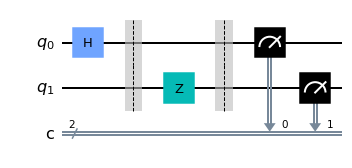

In [17]:
qc = QuantumCircuit(2,2)

qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])

qc.draw('mpl')

Option A. is to be discarded since the OpenQASM code shown has the wrong syntax:
- the `.` operator for the $H$ and $Z$ gates is misplaced, and should be substituted by a blank space;
- the `barrier` instruction __[is defined as](https://openqasm.com/language/delays.html#barrier-instruction)__ `barrier qregs|qubits` and does not allow for paretheses around the target qubits;
- from the __[docs](https://openqasm.com/language/insts.html#measurement)__, measurement in OpenQASM 2.0 is done with the command `measure qubit|qubit[] -> bit|bit[]` (while OpenQASM 3.0 also supports `bit|bit[] = measure qubit|qreg`).

A valid OpenQASM code that builds our circuit diagram could be:

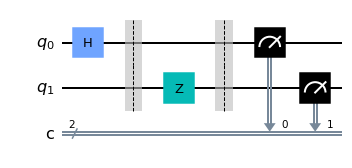

In [25]:
qasm_str = '''OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
barrier q[0],q[1];
z q[1];
barrier q[0], q[1];
measure q -> c;
'''

circ = QuantumCircuit.from_qasm_str(qasm_str)

circ.draw('mpl')

Option B. is not an answer also because of syntax:
- no explicit `QuantumRegister` is defined, so individual qubits should be addressed by their (integer) index;
- the `.measure()` method is defined as `QuantumCircuit.measure(qubit, cbit)`, so it has to be called on a `QuantumCircuit` object and __[does not support](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html)__ the arrow operator;also, it returns an `InstructionSet` object which does not support composition by the `+` operator.

For similar reason, option D. is also to be excluded.

---
---

### 8. Which code fragment would produce the illustrated circuit?

![question8](./imgs/question8_.png)

- A.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

- B.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(cr,a,qr)
qc.h(qr[0:2])
qc.x(a[0])

- C.

In [ ]:
qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:1])
qc.x(a[0])

- D.

In [ ]:
qr = QReg(2,'q')
a = QReg (1,'a')
cr = CReg(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

---

The answer is __A__. In fact, if we run it:

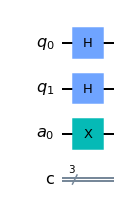

In [34]:
qr = QuantumRegister(2,'q')
a = QuantumRegister(1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

qc.draw('mpl')

Option B. does not hold since the two `QuantumRegister`s are passed to the `QuantumCircuit()` constructor in the wrong order, meaning that the `a` register will appear above the `q` one. To achieve the desiderd result, we should have `qc = QuantumCircuit(cr,qr,a)` instead of `qc = QuantumCircuit(cr,a,qr)`.

Option C. has the registers in order, but the `qc.h(qr[0:1])` instruction specifies that the $H$-gate should be applied only to the $0$-th qubit of the `qr` register, due __[how list slicing works in Python](https://stackoverflow.com/questions/509211/understanding-slicing)__. `qc.h(qr[0:2])` or `qc.h(qr)` would be the valid alternatives.

In D., the `QReg` and `CReg` syntaxes for defining quantum and classical register are not correct.

---
---

### 9. Select 2. Given this code fragment:

In [6]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.measure(qr, cr)
job = execute(qc, backend)

job_id = job.job_id()

ibmqfactory.load_account:WARNING:2023-01-11 15:56:13,814: Credentials are already in use. The existing account in the session will be replaced.


### Which two lines of code would each provide some information about the job?

- A. `job_monitor(job)`
- B. `job_monitor(backend)`
- C. `backend.status()`
- D. `job.status()` 
- E. `provider.status()`

---

Answers are __A__ and __D__. The `.execute()` method returns an `IBMQJob` instance which can either be fed as a parameter to `.job_monitor()`, as specified __[here](https://qiskit.org/documentation/stable/0.28/stubs/qiskit.providers.ibmq.job.IBMQJob.html?highlight=ibmqjob#qiskit.providers.ibmq.job.IBMQJob)__:

```
    job_monitor(job, interval=None, quiet=False, output=<_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>, line_discipline='\r')
```

In [7]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


or can itself be used by invoking its `.status()` method, which, according to the __[docs](https://qiskit.org/documentation/stable/0.28/stubs/qiskit.providers.ibmq.job.IBMQJob.html?highlight=ibmqjob#qiskit.providers.ibmq.job.IBMQJob.status)__ also queries the server for the latest job status.

In [8]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

Choice B. can be eliminated by following the description of `.job_monitor()` above, where nowhere it is said that a backend object can be used as well.

Option C., while a valid instruction, it does not achieve what we want since __[the specifications](https://qiskit.org/documentation/stable/0.24/stubs/qiskit.providers.BaseBackend.html#qiskit.providers.BaseBackend)__ of the `qiskit.providers.BaseBackend` object tell us that its `.status()` method returns the backend status, and not that of the job.

Option E. is invalid since the `AccountProvider` __[object](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.AccountProvider.html)__ returned by `qiskit.providers.ibmq.IBMQFactory.load_account` does not have a `.status()` method.

Another alternative that allows monitoring the status of a lauched job is the `job_watcher` for __[Jupyter notebooks](https://qiskit.org/documentation/apidoc/tools_jupyter.html)__:

In [9]:
from qiskit.tools.jupyter import job_watcher
%qiskit_job_watcher

job = backend.retrieve_job(job_id)

result = job.result()
counts = result.get_counts()
print(counts)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

{'00': 516, '11': 508}


---
---

### 10. Select 2. Which two of these can be used to initialize a vector of complex amplitudes on a quantum circuit (`qc`)?

- A. `qc.initialize([0,1],0)`
- B. `qc.initialize([0,0,1,1,0])`
- C. `qc.initialize([0,1,1],[0,1])`
- D. `qc.initialize([1,0,0,0],[0,1])`
- E. `qc.initialize([1,0,0,0])`

---

Answers are __A__ and __D__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.initialize.html)__, the parameters of `QuantumCircuit.initialize(params, qubits=None)` are defined as:


```
- params (str or list or int):

    str: labels of basis states of the Pauli eigenstates Z, X, Y. See Statevector.from_label(). Notice the order of the labels is   reversed with respect to the qubit index to be applied to. Example label ‘01’ initializes the qubit zero to |1> and the qubit   one to |0>.

    list: vector of complex amplitudes to initialize to.

    int: an integer that is used as a bitmap indicating which qubits to initialize to |1>. Example: setting params to 5 would initialize qubit 0 and qubit 2 to |1> and qubit 1 to |0>.
```

```
- qubits (QuantumRegister or Qubit or int):

    QuantumRegister: A list of qubits to be initialized [Default: None].

    Qubit: Single qubit to be initialized [Default: None].

    int: Index of qubit to be initialized [Default: None].

    list: Indexes of qubits to be initialized [Default: None].
```

Meaning that option A. initializes the $0$-th qubit to the $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ state:

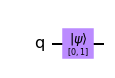

In [12]:
qc = QuantumCircuit(1)
qc.initialize([0,1], 0)
qc.draw('mpl')

while choice D. initializes the state of the first two qubits of the circuit to state $|00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$:

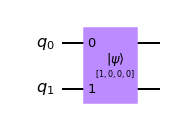

In [13]:
qc = QuantumCircuit(2)
qc.initialize([1, 0, 0, 0], [0, 1])
qc.draw('mpl')

Option B. is no good since the vector of complex amplitudes passed as input does not have a length that is a power of $2$ and is therefore not a valid one. Running the code would raise the exception:

```
QiskitError: 'Desired statevector length not a positive power of 2.'
```

Option C. does not work for the same reason.

As for option E., its syntax is not technically wrong, in the sense that the input list has a valid list of length $4$ and it is also possible to use `.initialize()` with just one parameter. However, this can only be done when specifying the state of single-qubit circuits, while the explicited statevector refers to a $2$-qubit system. 

We can verify this considerations with the following code:

In [17]:
qc = QuantumCircuit(1)
qc.initialize([1, 0, 0, 0])
qc.draw('mpl')

QiskitError: 'Initialize parameter vector has 4 elements, therefore expects 2 qubits. However, 1 were provided.'

---
---

### 11. Which code fragment could be used to produce this plot?

![question11](./imgs/question11.png)

The plot in the figure is the error map of the `ibmq_quito` backend. It can be displayed with the `qiskit.visualization.plot_error_map` __[function](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_error_map.html)__, defined as

```
    plot_error_map(backend, figsize=(12, 9), show_title=True, qubit_coordinates=None)
```

A code example is given below:

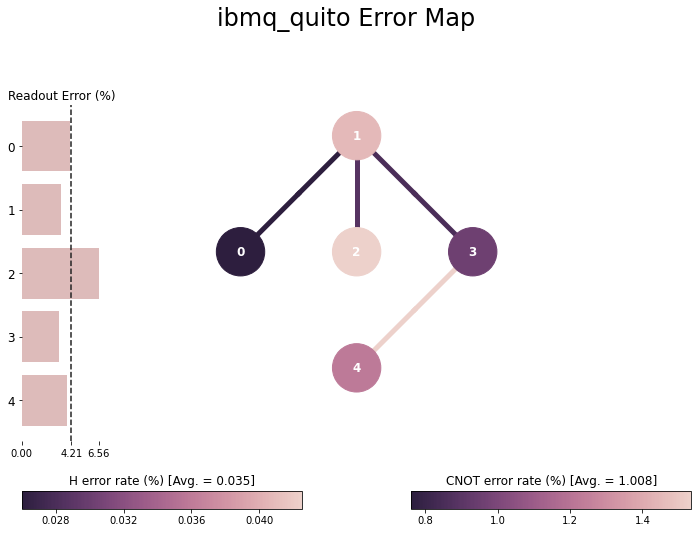

In [19]:
from qiskit.visualization import plot_error_map

backend = provider.get_backend('ibmq_quito')
plot_error_map(backend)

A similar plot, that outlines the connectivity of the specified backend, can be achieved with `qiskit.visualization.plot_gate_map`, that the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_gate_map.html)__ specify as:

```
    plot_gate_map(backend, figsize=None, plot_directed=False, label_qubits=True, qubit_size=None, line_width=4, font_size=None, qubit_color=None, qubit_labels=None, line_color=None, font_color='w', ax=None, filename=None, qubit_coordinates=None)
```

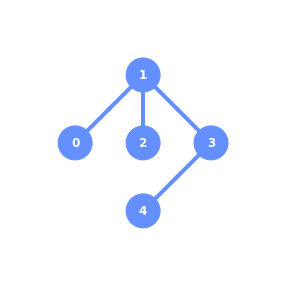

In [20]:
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)

---
---

### 12. Which code fragment, when inserted into the code below, would create a circuit with a matrix different to the identity matrix?

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)

# insert code here

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

- A.

In [ ]:
qc.crz(pi,0,1)
qc.crz(-pi,0,1)

- B.

In [ ]:
qc.crz(pi,0,1)
qc.cp(pi,0,1)

- C.

In [ ]:
qc.cz(0,1)
qc.cz(1,0)

- D.

In [ ]:
qc.cz(0,1)
qc.cp(pi,0,1)

---

The answer is __B__. This is because the $P$-gate (`PhaseGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)__) is equivalent to $R_z$ (`RZGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RZGate.html)__) up to a phase factor:

$$ P(\lambda) = e^{i{\lambda}/2} R_z(\lambda) $$

In the single qubit case, this is just an irrelevant global phase, but when we consider the associated controlled operations, i.e., the $CP$ (`CPhaseGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CPhaseGate.html#qiskit.circuit.library.CPhaseGate)__) and the $CR_z$ (`CRZGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRZGate.html#qiskit.circuit.library.CRZGate)__), they are actually different gates, with a relative phase difference, and therefore their combination does not perform a complete rotation of $2\pi$ around the Z-axis, which would account for a trivial identity.

The difference between the two operation can be visualized by explicitly writing down their matrices (following Qiskit's ordering, see the __Note__ __[here](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CRZGate.html#qiskit.circuit.library.CRZGate)__):

$$ \begin{split}CR_z(\lambda)\ q_0, q_1 =
    I \otimes |0\rangle\langle 0| + R_z(\lambda) \otimes |1\rangle\langle 1| =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & e^{-i\frac{\lambda}{2}} & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\frac{\lambda}{2}}
    \end{bmatrix}\end{split} \longrightarrow CR_z(\pi) = 
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & -i & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & i
    \end{bmatrix} $$

$$ \begin{split}CP(\lambda) =
    I \otimes |0\rangle\langle 0| + P(\lambda) \otimes |1\rangle\langle 1| =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & e^{i\lambda}
    \end{bmatrix}\end{split} \longrightarrow CP(\pi) =
    \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & -1
    \end{bmatrix} $$

and then combining them as in the circuit, showing that the result is indeed not the identity,

$$ CP(\pi) CR_z(\pi) = 
\begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & -i & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        0 & 0 & 0 & -i
\end{bmatrix} $$

This same result can also be verified with Qiskit's `unitary_simulator` as:

In [39]:
qc = QuantumCircuit(2)

qc.crz(pi,0,1)
qc.cp(pi,0,1)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

[[ 1.0000000e+00+0.j  0.0000000e+00+0.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00-1.j  0.0000000e+00+0.j
   0.0000000e+00+0.j]
 [ 0.0000000e+00+0.j  0.0000000e+00+0.j  1.0000000e+00+0.j
   0.0000000e+00+0.j]
 [-0.0000000e+00+0.j -0.0000000e+00+0.j -0.0000000e+00+0.j
  -1.2246468e-16-1.j]]


Another proof can be done by initializing the circuit to a state such as $|++\rangle$, that is not an eigenstate of the $CP(\pi) CR_z(\pi)$ operation (which would otherwise vanish the effect we are trying to visualize), and then checking that the transformed state is different from the starting one. We will do that with the help of the `statevector_simulator`:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


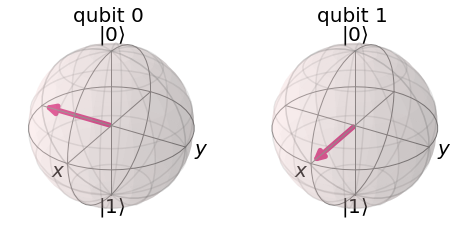

In [46]:
qc = QuantumCircuit(2)

qc.h([0, 1])

qc.crz(pi,0,1)
qc.cp(pi,0,1)

sv_sim = Aer.get_backend('statevector_simulator')
statevector = execute(qc, sv_sim).result().get_statevector()
plot_bloch_multivector(statevector)

which produces the output state $|+\circlearrowright\rangle$. We have found a counter-example of non-trivial transformation that is performed by our gates, i.e.,

$$ CP(\pi) CR_z(\pi) |++\rangle = |+\circlearrowright\rangle $$

Concerning the other alternatives, A. is trivially an identity since it involves two consecutive rotations of the same angle in opposite directions.

Choice C. is excluded by considering that the $CZ$ gate is symmetric, i.e., the following identity holds

![question12](./imgs/question12.png)

and since this operation is also Hermitian, the resulting trasformation is the identity matrix.

As for D., from the fact that $CZ = CP(\pi)$, combined with the above considerations, also results in an overall identity transformation.

---
---

### 13. Given the devide details below from `%qiskit_backend_overview`

In [184]:
import qiskit.tools.jupyter 
%qiskit_backend_overview

QiskitError: 'No backends available.'

### Which device would you send your job, if you wanted the results as soon as possible?

---

From the pop-up window that is returned by `qiskit_backend_overview`, the device that would execute the job the fastest is the one that has the `Least Busy` parameter set to `True`. In the case that this backend did not disposed of a sufficient number of qubits to run the circuit associated with the experiment, the optimal choice would be made on the appropriate device that has the least amount of pending jobs.

---
---

### 14. Which code fragment will create the circuit shown when inserted into the code below?

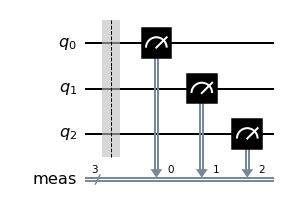

In [49]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)

# insert code here 

- A.

In [ ]:
qc.measure_all()

- B.

In [ ]:
qc = QuantumCircuit(3)
qc.measure()

- C.

In [ ]:
qc = QuantumCircuit(3)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)

- D.

In [ ]:
qc = QuantumCircuit(3)
for n in range(len(qc.qubits)):
    qc.measure(n,n)

---

The answer is __A__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure_all.html)__, the `.measure_all()` method, that adds a measurement to all qubits, is defined as 

```
    QuantumCircuit.measure_all(inplace=True, add_bits=True)
```

which 

```
    By default, adds new classical bits in a ClassicalRegister to store these measurements. If add_bits=False, the results of the measurements will instead be stored in the already existing classical bits, with qubit n being measured into classical bit n.
```

meaning that even though the `QuantumCircuit` has not been explicitly built with classical bits to store the result of measurement to, `.measure_all()` takes case of adding them automatically, resulting in the circuit shown in the image.

Running the complete circuit proves this statement:

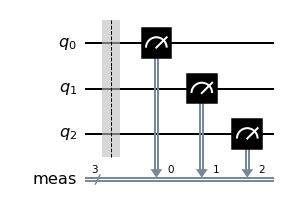

In [6]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)

qc.measure_all()

qc.draw('mpl')

Option B. is not valid since, from the __[definition](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html)__ of `.measure()`, it has an incorrect syntax, as the method requires the parameters specifying both the quantum and classical registers to involve in the measurement operation.

Option C. does explicit such parameters, but the method also works on the assumption that the classical bits to store the measurement to are already present in the circuit, which is not the case as the `QuantumCircuit` object has been instatiated with just quantum registers.

D. does not work from the same reason as C., as the code is logically equivalent to the other option.

---
---

### 15. Assuming that this sample code is added at each barrier in the QuantumCircuit, sort the Q-sphere in the order that they will display.

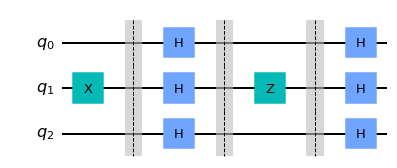

In [7]:
qc = QuantumCircuit(3)

qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)
qc.barrier()

qc.z(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)

qc.draw('mpl')

---

To my understanding, the question is asking to display in a Q-sphere each of the states of the system before each barrier in the circuit of the defined quantum circuit. The QSpheres of initial and final states will also be visualized to add some considerations on the circuit shown.

As no explicit initialization is done, the starting state of the system is $|000\rangle$. To visualize its correspondig Q-sphere, we use the `qiskit.visualization.plot_state_qsphere` __[method](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_qsphere.html)__, passing to it a `Statevector` __[object](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html#qiskit.quantum_info.Statevector)__ (we could also use a `DensityMatrix` __[one](https://qiskit.org/documentation/stubs/qiskit.quantum_info.DensityMatrix.html#qiskit.quantum_info.DensityMatrix)__) which we can either define explicitly, or get from a `statevector_simulator`:

In [14]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
sv_sim = Aer.get_backend('statevector_simulator')

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


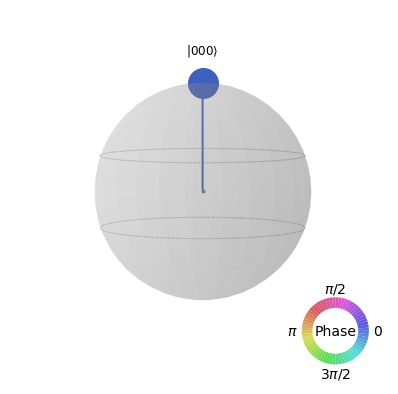

In [16]:
statevector = Statevector([1, 0, 0, 0, 0, 0, 0, 0])
plot_state_qsphere(statevector)

Right up to the first barrier, the state of the system is 

$$ (I \otimes X \otimes I)|000\rangle = |010\rangle $$

to which corresponds the Q-sphere

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


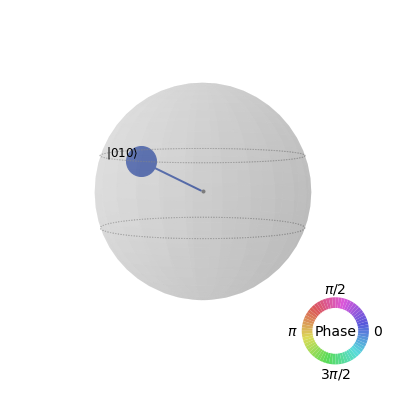

In [10]:
qc = QuantumCircuit(3)
qc.x(1)
statevector = execute(qc, sv_sim).result().get_statevector(qc)
plot_state_qsphere(statevector)

Up to the second `.barrier()` the state becomes

$$ H^{\otimes 3} |010\rangle = |+-+\rangle = \tfrac{1}{8} \big( |000\rangle + |001\rangle - |010\rangle - |011\rangle
+ |100\rangle + |101\rangle - |110\rangle - |111\rangle \big) $$

corresponding to

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


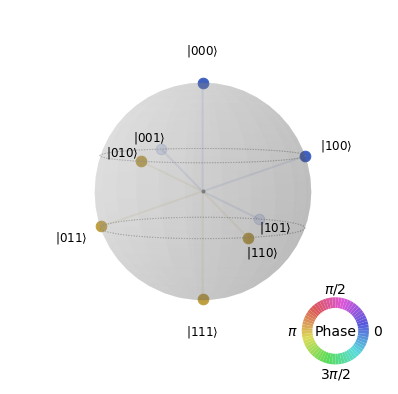

In [11]:
qc = QuantumCircuit(3)
qc.x(1)
qc.h(0)
qc.h(1)
qc.h(2)
statevector = execute(qc, sv_sim).result().get_statevector(qc)
plot_state_qsphere(statevector)

And up to the final barrier we have 

$$ (I \otimes Z \otimes I) |+-+\rangle = |+++\rangle = \tfrac{1}{8} \big( |000\rangle + |001\rangle + |010\rangle + |011\rangle
+ |100\rangle + |101\rangle + |110\rangle + |111\rangle \big) $$

which has the following Q-sphere:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


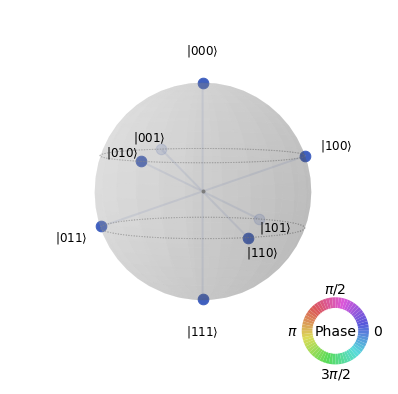

In [12]:
qc = QuantumCircuit(3)
qc.x(1)
qc.h(0)
qc.h(1)
qc.h(2)
qc.z(1)
statevector = execute(qc, sv_sim).result().get_statevector(qc)
plot_state_qsphere(statevector)

The output state of the entire circuit will then be

$$ H^{\otimes 3} |+++\rangle = |000\rangle $$

which is the same as the starting one.

We verify this with the `statevector_simulator`:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


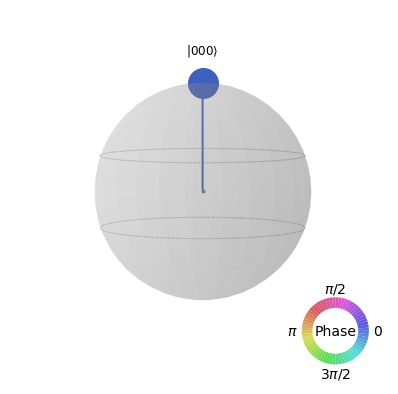

In [17]:
qc = QuantumCircuit(3)
qc.x(1)
qc.h(0)
qc.h(1)
qc.h(2)
qc.z(1)
qc.h(0)
qc.h(1)
qc.h(2)
statevector = execute(qc, sv_sim).result().get_statevector(qc)
plot_state_qsphere(statevector)

This is because the operations applied to each qubit all result into identity operations: in qubits $q_0$ and $q_2$, we have $HH$, where the second Hadamard brings the state representation back to the Z-basis after the first one has transformed it from the Z- to the X-basis. As for $q_1$, the known identity $X = HZH$ makes so that, in total, $HZHX=XX=I$.

---
---

### 16. Select 2. Given the following code:

In [ ]:
from qiskit import BasicAer, Aer, execute
qc = QuantumCircuit(1)
qc.h(0)

# insert code here

print(unitary)

### Which two code fragments would you insert above to print the below output?

```
    [[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
    [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]
```

- A.

In [ ]:
simulator = BasicAer.get_backend('unitary_simulator')
unitary = execute(qc, simulator).get_unitary(qc)

- B.

In [ ]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)

- C.

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
unitary = result.get_matrix_result(qc)

- D.

In [ ]:
simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)

- E.

In [ ]:
simulator = BasicAer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary()

Answer are __B__ and __E__. These are the only two working options, and they differ only by the invoked `Aer` and `BasicAer` modules, which, in this context, are equivalent.

As an example, if we run option E.:

In [28]:
qc = QuantumCircuit(1)
qc.h(0)

simulator = BasicAer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary()

array_to_latex(unitary)

<IPython.core.display.Latex object>

which indeed corresponds to the definition of the Hadamard gate:

$$ H = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$  

Option A. would not work as the output of the `.execute()` method called on a `BasicAer` simulator does not have an attribute `get_unitary`, which should be called on a result-type object invoked with `.result()` first.

For C. and D., both the `.get_matrix_result()` and `.get_unitary()` methods are not defined on a result extracted from a `statevector_simulator`.

---
---

### 17. Which code fragment defines vector such that the code below

In [ ]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt

# insert code here

plot_bloch_vector(vector)

###  will show the following output?

![question17](./imgs/question17.png)

- A.

In [ ]:
vector = [1,-1,0]

- B.

In [ ]:
vector = [pi/2,-pi/4,0]

- C.

In [ ]:
vector = [1/sqrt(2),-1/sqrt(2),0]

- D.

In [ ]:
vector = [1/sqrt(2),-1/sqrt(2),-1]

The answer is __C__. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html)__ of `qiskit.visualization.plot_bloch_vector`:

```
    plot_bloch_vector(bloch, title='', ax=None, figsize=None, coord_type='cartesian')
```

Meaning that if not otherwise explicited, by default the list passed to it is interpreted as Cartesian coordinates. The observations of the plotted Bloch sphere tells us that the required Bloch vector is such that:
1. its modulus is less than 1;
2. it lies on the XY plane;
3. it is equidistant from the X and (negative) Y axes.
  
The answer is the only one that satisfies all three of those conditions, as we can also see directly with:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


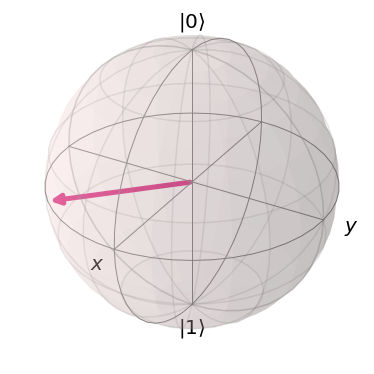

In [45]:
plot_bloch_vector([1/sqrt(2), -1/sqrt(2), 0])

Choice A. is not what we are looking for since, while the corresponding vector lies on the XY plane (the $z$ coordinate is `0`) and for it, condition 2. is also verified, it has a modulus of $\sqrt{2}$, which would translate on a vector drawing that goes way outside the reference sphere:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


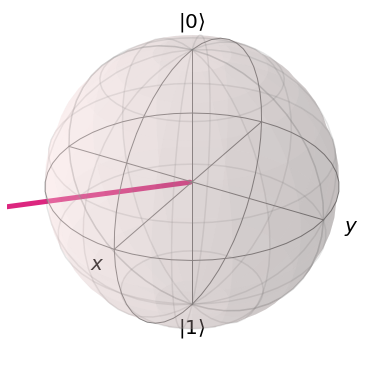

In [46]:
plot_bloch_vector([1,-1,0])

Choice B. also violates condition 1., and in addition condition 3. also does not hold, as the $x$ and $y$ coordinates are of different magnitude.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


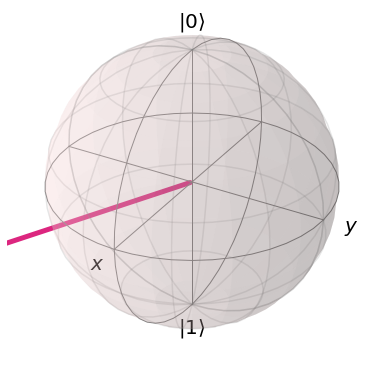

In [47]:
plot_bloch_vector([pi/2,-pi/4,0])

On the other hand, option D. is such that conditions 1. and 3. hold, while 2. does not, as the $z$ coordinate is of a non-zero value.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


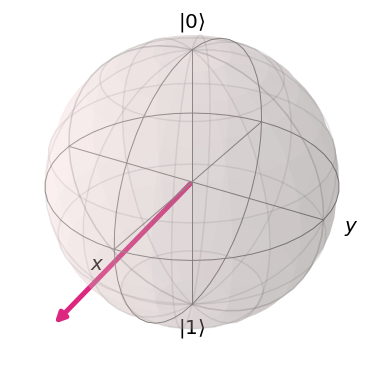

In [48]:
plot_bloch_vector([1/sqrt(2),-1/sqrt(2),-1])

---
---

### 18. How many qubits does this Q-sphere represents? 

![question18](./imgs/question18.png)

---

The Q-sphere shows the state of a __3__-qubit system in the state

$$ |\psi\rangle = \tfrac{\displaystyle|010\rangle + |101\rangle}{\displaystyle\sqrt{2}} $$

One such visualization can be achieved from a circuit like:

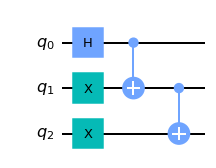

In [55]:
qc = QuantumCircuit(3)

qc.h(0)
qc.x([1, 2])
qc.cx(0,1)
qc.cx(1,2)

qc.draw('mpl')

This circuit derives from that used to generate a 3-qubit __[GHZ state](https://arxiv.org/abs/0712.0921)__, which is similar to this one, except that it does not have the two $X$-gates on $q_1$ and $q_2$.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


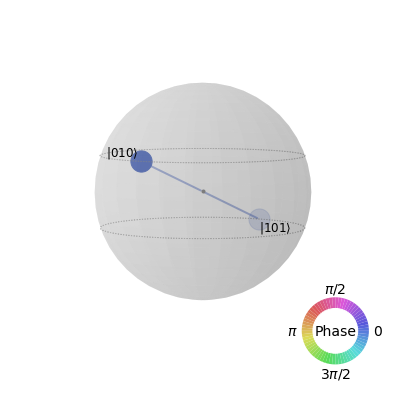

In [56]:
sv_sim = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
statevector= job.get_statevector()

plot_state_qsphere(statevector)

---
---

### 18. Which code fragment produces this output?

```
[[ 0.7+0.j  0.7+0.j]
 [-0.7-0.j  0.7+0.j]]
```

---

Choices are not available from the source, so we'll build it ourselves. By observing the output we notice that the shown unitary has the form 

$$ \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ -1 & 1 \end{bmatrix}  $$

which is somewhat alike to the $H$-gate, defined as

$$ H = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}  $$

therefore, we should start seeking the answer from this operation. In particular, our unitary corresponds to an $H$-gate where its columns have been inverted. Switching the order of columns of a matrix is something that can be done by right-multiplying it by an appropriate permutation matrix. Luckily, no effort is required in finding such matrix, since in this single-qubit system the only non-trivial permutation matrix is the one that defines the $X$-gate. Hence, the sought unitary is

$$ HX = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$

We verify this by building a circuit that implements it:

In [64]:
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

u_sim = Aer.get_backend('unitary_simulator')
result = execute(qc, u_sim).result()
unitary = result.get_unitary(qc,1)

print(unitary)

[[ 0.7+0.j  0.7+0.j]
 [-0.7-0.j  0.7+0.j]]


---
---

### 19. Which code fragment produces this circuit?

![question19](./imgs/question19.png)

---

Choices are not available from source, again, we'll build it ourselves. There is a number of ways that the circuit in the diagram can be built; the most straightforward way is the following:

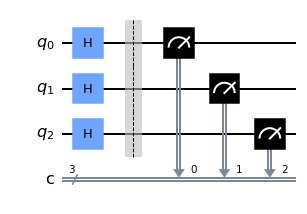

In [80]:
qc1 = QuantumCircuit(3,3)

qc1.h([0,1,2])
qc1.barrier()
qc1.measure([0,1,2],range(3))

qc1.draw('mpl')

And another alternative could be a generalization that takes advantage of registers:

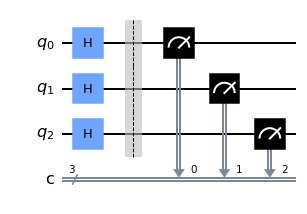

In [81]:
q = QuantumRegister(3, name="q")
cbits = ClassicalRegister(3, name="c")

qc2 = QuantumCircuit(q, cbits)

qc2.h(q)
qc2.barrier()
qc2.measure(q, cbits)

qc2.draw('mpl')

All such variants are equivalent, which can be proven by examining the OpenQASM code that they are compiled into:

In [82]:
qc1.qasm() == qc2.qasm()

True

---
---

### 20. Which would be printed when calling `print(counts)` in the code below? A drawing of `qc` in its final state has been included.

In [ ]:
qc= QuantumCircuit(3)

qc.x([0,1,2])
qc.ccx(0,1,2)
qc.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
result = execute(qc, qasm_sim).result()
counts = result.get_counts()

print(counts)

![question20](./imgs/question20.png)

---

The answer is `{'011': 1024}`. We can deduce that by observing the circuit structure, composed of an initialization stage in the $|111\rangle$ state and a Toffoli (`CCXGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CCXGate.html)__) gate acting on $q_2$ and controlled by the other two qubits. Since no actual purely-quantum operations are involved, we can directly treat the Toffoli as a traditional $AND$ gate, flipping the target qubit if both of its controls are $|1\rangle$, as it occurs here. Since the target is also $|1\rangle$, it gets flipped to $|0\rangle$, resulting in the $|011\rangle$ overall output system state.

We can also see this mathematically by considering the matrix representation of the Toffoli (which follows Qiskit's bit ordering, as also mentioned in question 12.): 

$$ \begin{split}CCX q_0, q_1, q_2 =
    I \otimes I \otimes |0 \rangle \langle 0| + CX \otimes |1 \rangle \langle 1| =
   \begin{pmatrix}
        1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
        0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
        0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
    \end{pmatrix}\end{split} $$

which applied to our problem results in

$$ CCX(X\otimes X\otimes X)|000\rangle = CCX|111\rangle = |011\rangle $$

Also because of the classical nature of the computation, the output is deterministic, so measurement yields the `011` output with probability 1. From the __[definition](https://qiskit.org/documentation/stable/0.24/apidoc/execute.html)__ of the `execute()` function,

```
    execute(experiments, backend, basis_gates=None, coupling_map=None, backend_properties=None, initial_layout=None, seed_transpiler=None, optimization_level=None, pass_manager=None, qobj_id=None, qobj_header=None, shots=1024, memory=False, max_credits=10, seed_simulator=None, default_qubit_los=None, default_meas_los=None, schedule_los=None, meas_level=<MeasLevel.CLASSIFIED: 2>, meas_return=<MeasReturnType.AVERAGE: 'avg'>, memory_slots=None, memory_slot_size=100, rep_time=None, rep_delay=None, parameter_binds=None, schedule_circuit=False, inst_map=None, meas_map=None, scheduling_method=None, init_qubits=None, **run_config)
```

the default shots that the simulated experiment is run on is 1024, meaning that the `qiskit.result.Result.get_counts` method will return a dictionary where the $|011\rangle$ state has been measured for each of such shots, i.e., `print(counts)` will output our answer

```
    {'011': 1024}
```

---
---

### 20. Given the code:

In [ ]:
from qiskit.quantum_info import DensityMatrix

matrix1 = [
    [1,0],[0,0]
]
matrix2 = [
    [0.5,0.5],[0.5,0.5]
]

#### Which code fragment would provide the below output?

```
    DensityMatrix([[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))
```

- A.

In [ ]:
result = DensityMatrix.tensor(matrix1, matrix2)
print(result)

- B.

In [ ]:
matrix1 = DensityMatrix(matrix1)
print(matrix1.tensor(matrix2))

- C.

In [ ]:
print(matrix1.tensor(matrix2))

- D.

In [ ]:
print(DensityMatrix.tensor(matrix1,matrix2))

---

The answer is __B__. This is the only option that contains a working set of instructions according to the `DensityMatrix` __[docs](https://qiskit.org/documentation/stable/0.24/stubs/qiskit.quantum_info.DensityMatrix.html#qiskit.quantum_info.DensityMatrix.tensor)__: first a `DensityMatrix` is instantiated on the first list, and then the `.tensor()` method is called on it to calculate its tensor product with the second set of data passed as a parameter. The output is also a `DensityMatrix` object.

We can see that by running the complete code:

In [98]:
from qiskit.quantum_info import DensityMatrix

matrix1 = [
    [1,0],[0,0]
]
matrix2 = [
    [0.5,0.5],[0.5,0.5]
]

matrix1 = DensityMatrix(matrix1)
print(matrix1.tensor(matrix2))

DensityMatrix([[0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]],
              dims=(2, 2))


which corresponds to the following operation:

$$ \begin{bmatrix} 1 & 0 \\ 0 & 0 \end{bmatrix} \otimes \tfrac{1}{2} \begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} = 
\tfrac{1}{2} \begin{bmatrix} 1 & 1 & 0 & 0 \\ 1 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{bmatrix} $$

Option A. would result in an error, since `.tensor()` is a method of the `DensityMatrix` class, and not a static function, meaning that it has to be called on an already-instantiated `DensityMatrix` object; also, the method allows for one `data` parameter at a time, not 2.

C. would raise an error as well, as the `DensityMatrix` class is never invoked, and traditional Python lists do not have a `tensor` attribute.

D. is logically equivalent to the code in choice A. and therefore has the same issues.

---
---

### 21. Which diagram will be produced by the circuit illustrated below?

In [ ]:
from qiskit.visualization import plot_state_city
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.z(0)

simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc,simulator).result()
statevector = job.get_statevector()

plot_state_city(statevector)

---

From the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_city.html)__ of `plot_state_city()`, defined as 

```
    plot_state_city(state, title='', figsize=None, color=None, alpha=1, ax_real=None, ax_imag=None, *, rho=None, filename=None)
```

this function plots the cityscape of the quantum state passed to it. In particular, it plots two 3d bar graphs (two dimensional) of the real and imaginary part of the density matrix `rho`.

The defined circuit has the following diagram:

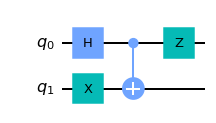

In [125]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.z(0)

qc.draw('mpl')

Whose output state is represented in a cityscape as

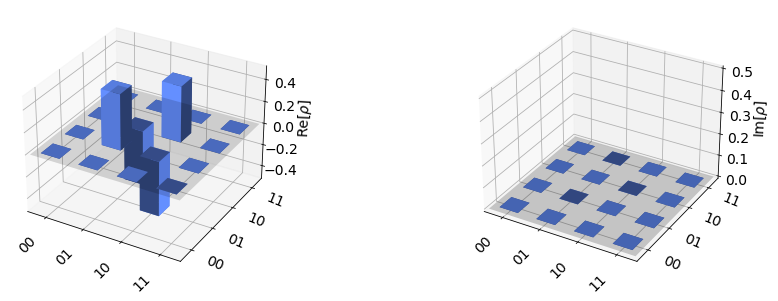

In [126]:
simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc, simulator).result()
statevector = job.get_statevector()
plot_state_city(statevector)

This plot allows us to visualize all of the 16 complex amplitudes that make up a density matrix referred to a 2-qubit system, in the way explained __[here](https://quantumcomputing.stackexchange.com/questions/6731/the-meaning-of-the-city-plot-in-qiskit)__.

Particularly, it shows the amplitudes related to the states $|01\rangle$ and $|10\rangle$, which have been entangled by our circuit.

__Digression on the final state__

The given circuit is quite a peculiar one, as it is a variant of one of the circuits that generates a Bell pair. We can see this mathematically:

$$ \begin{align*} 
 & (Z \otimes I) CNOT (X \otimes H) |00\rangle = \\
 & = (Z \otimes I) CNOT \Big( |1\rangle \otimes \tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \Big) = (Z \otimes I) CNOT \tfrac{1}{\sqrt{2}} (|10\rangle + |11\rangle) = \\
 & = (Z \otimes I) \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle)
\end{align*} $$

Up until this point, the state $ \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $  is already an entangled one. In fact, the circuit that achieves it (without the $Z$-gate) is the one that is a standardized Bell-pair generator. 

The final output state is

$$ (Z \otimes I) \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $$ 

which is the same as the one in the previous step, as the $Z$-gate does not have any effect on its eigenstates, $|0\rangle$ and $|1\rangle$, leaving them unchanged, just as the identity operation on the second qubit. The result is therefore still an entangled pair. 

We can verify this by running the actual experiment with a `qasm_simulator`:

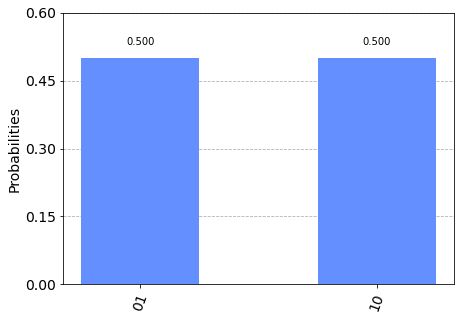

In [127]:
sim = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, simulator).result().get_counts()
plot_histogram(counts)

where the counts from the simulation indeed reflect the expected state.

---
---

### 21. When starting at qubit state $|0\rangle$, which code snippet will result in the qubit state $|0\rangle$?

- A.

In [ ]:
qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

- B.

In [ ]:
qc.ry(pi/2,0)
qc.rx(pi/2,0)
qc.s(0)

- C.

In [ ]:
qc.s(0)
qc.ry(pi/2,0)
qc.rx(pi/2,0)

- D.

In [ ]:
qc.rx(pi/2,0)
qc.s(0)
qc.ry(pi/2,0)

---

The answer is __A__. From the definition of each of the three gate involved, the $R_y$-gate (`RYGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RYGate.html)__), the $S$-gate (`SGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.SGate.html)__), and the `R_x` gate (`RXGate`, __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RXGate.html)__), it is immediate to see that the combinations of those three rotations bring the state of the system to the initial $|0\rangle$, since it involves a southward, an eastward and a northward rotation, each of $\pi/2$ around the respective axes.

This can be verified mathematically, starting from the the definitions of the gates in the docs:

$$ R_x(\tfrac{\pi}{2}) S R_y(\tfrac{\pi}{2}) = \begin{bmatrix} 0 & -i \\ -i & 0 \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \begin{bmatrix} 0 & -1 \\ 0 & i \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$$

which is the same as a single $S$- gate. Since $|0\rangle$ is one of the eigenstates of the $S$ transformation, the application of the circuit does not change the starting state.

We can also verify this with Qiskit by plotting the Bloch sphere on the final statevecort of the circuit:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


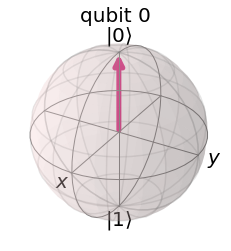

In [136]:
qc = QuantumCircuit(1)

qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc, simulator).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


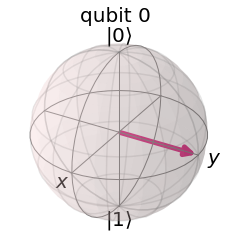

In [137]:
qc = QuantumCircuit(1)

qc.ry(pi/2,0)
qc.rx(pi/2,0)
qc.s(0)

simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc, simulator).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

Option B. does not work since the first $R_y(\pi/2)$ rotation brings the Bloch vector down to the $|+\rangle$ state, in the X-basis, where the second $R_x(\pi/2)$ has no effect, therefore removing one operation that is necessary to achieve 'identity' with the other gates.

C. and D. are not valid for the same reason, but on different axes.

---
---

### 22. How would you compute the tensor product of the density matrices of the final states associated with the two defined circuits in the code below?

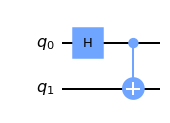

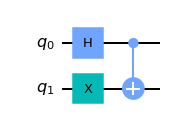

In [151]:
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

display(qc.draw('mpl')) # this line was added for visualization

qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.cx(0,1)

display(qc1.draw('mpl')) # this line was added for visualization

__Note__

The complete question is not available from the original source, just the code snippet. For this reason, I am inferring the question and answer myself, so you should know that this may not correspond to the official question.

---

From the __[docs](https://qiskit.org/documentation/stable/0.24/stubs/qiskit.quantum_info.DensityMatrix.html)__ of `DensityMatrix`, we know that we can automatically extract the density matrix of the statevector that is the result of the evolution of a circuit through the `.from_instruction()` function, defined as

```
    Return the output density matrix of an instruction.

    The statevector is initialized in the state |0,…,0⟩ of the same number of qubits as the input instruction or circuit, evolved by the input instruction, and the output statevector returned.
```

Therefore:

In [152]:
rho_qc = DensityMatrix.from_instruction(qc)
rho_qc.draw('latex')

<IPython.core.display.Latex object>

In [153]:
rho_qc1 = DensityMatrix.from_instruction(qc1)
rho_qc1.draw('latex')

<IPython.core.display.Latex object>

Once we have the two `DensityMatrix` objects, we can call the `.tensor()` method on the first one to get the result we are looking for:

In [155]:
tensor1 = rho_qc.tensor(rho_qc1)
tensor1.draw('latex')

<IPython.core.display.Latex object>

---
---

### 23. How can a 2-qubit circuit be initialized in an entangled state without generating through the related circuit?

__Note__

As in the question before, the complete question is missing, so I am inferring its structure.

---

The traditional Bell pair can be described by the statevector:

$$ \tfrac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix} $$

therefore, one way we can initialize our circuit is with the vector `[1/sqrt(2), 0, 0, 1/sqrt(2)]`:

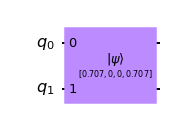

In [162]:
qc = QuantumCircuit(2)

v = [1/sqrt(2), 0,  0, 1/sqrt(2)]
qc.initialize(v,[0,1])

qc.draw(output='mpl')

We verify that this this corresponds to our entagled state with the `statevector_simulator`:

In [163]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()

array_to_latex(statevector)

<IPython.core.display.Latex object>

---
---

### 24. How can a Toffoli gate be built from a $CNOT$?

__Note__

Again, I am missing the complete question, so I'll build it myself.

---

The $CNOT$ gate in Qiskit is defined as the `CXGate`. From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html)__, this class has a `control()` method described as:

```
    CXGate.control(num_ctrl_qubits=1, label=None, ctrl_state=None)
```

which

```
    Return a controlled-X gate with more control lines.
```

meaning that one way of defining a Toffoli is the following, where we considered that the `.control()` method does not require any parameters as, by default, `num_ctrl_qubits=1`, which is exactly what we need to build our Toffoli.

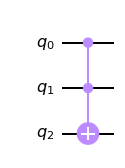

In [164]:
from qiskit.circuit.library import CXGate

ccx = CXGate().control()

qc = QuantumCircuit(3)

qc.append(ccx,[0,1,2])

qc.draw('mpl')

---
---

### 25. Wich code snipped generates the circuit diagram below?


![question25](./imgs/question25.png)

__Note__

Alternative answers are not available, so I'll propose one and justify it.

---

From the __[docs](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.barrier.html)__ of `qiskit.circuit.QuantumCircuit.barrier`, the method is defined as:

```
    QuantumCircuit.barrier(*qargs, label=None)
```

where

```
    qargs (QubitSpecifier) – Specification for one or more qubit arguments.
```

Meaning that one way of generating our circuit is

In [166]:
qc= QuantumCircuit(3)

qc.barrier()
qc.barrier([0])

We can verify our answer by drawing the corresponding diagram:

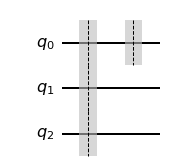

In [167]:
qc.draw('mpl')

---
---

### 26. How can the below diagram be built in Qiskit starting from an OpenQASM file ?

![question26](./imgs/question26.png)

__Note__

Alternatives are missing, direct solution is provided.

---

The `QuantumCircuit` class (docs, __[here](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html)__) has a `.from_qasm_file()` method defined as 

```
    QuantumCircuit.from_qasm_file(path)
```

with parameter

```
    path (str) – Path to the file for a QASM program
```

that returns 

```
    The QuantumCircuit object for the input QASM
```

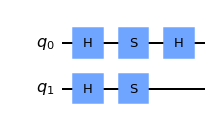

In [173]:
qc = QuantumCircuit.from_qasm_file('./myfile.qasm')
qc.draw('mpl')

To build the rest of the circuit we just need to do tadd measurement:

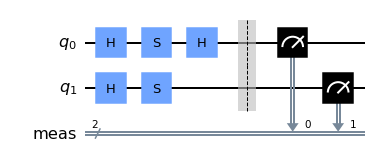

In [174]:
qc.measure_all()
qc.draw(output='mpl')

---
---

### 27. Given the code below, which fragment displays the following output?

In [175]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_state_paulivec, plot_state_city, plot_bloch_vector, plot_state_hinton, plot_bloch_multivector

statevec = Statevector.from_label('001')

# insert code here

![question27](./imgs/question27.png)

- A.

In [ ]:
plot_state_qsphere(statevec)

- B.

In [ ]:
plot_state_paulivec(statevec)

- C.

In [ ]:
plot_state_city(statevec)

- D.

In [ ]:
plot_bloch_multivector(statevec)

- E.

In [ ]:
plot_state_hinton(statevec)

---

The answer is __B__. The plot shown in the figure is related to a Pauli vector, which the `qiskit.visualization.plot_state_paulivec` function displays, as described in the __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_paulivec.html)__:

```
    Plot the paulivec representation of a quantum state.

    Plot a bargraph of the mixed state rho over the pauli matrices.
```

In fact,

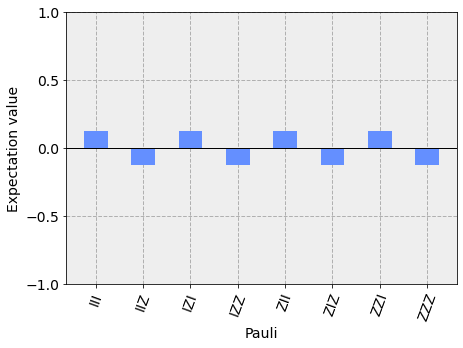

In [179]:
plot_state_paulivec(statevec)

Option A. plots the already mentioned Q-sphere, used to visualize multi-qubit states.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


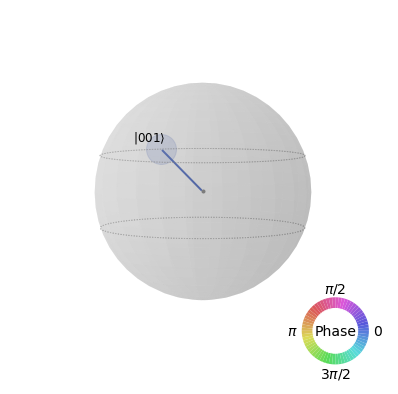

In [180]:
plot_state_qsphere(statevec)

Option C. has also already been shown, as the function that displays the cityscape diagram of the density matryix associated with the system's state.

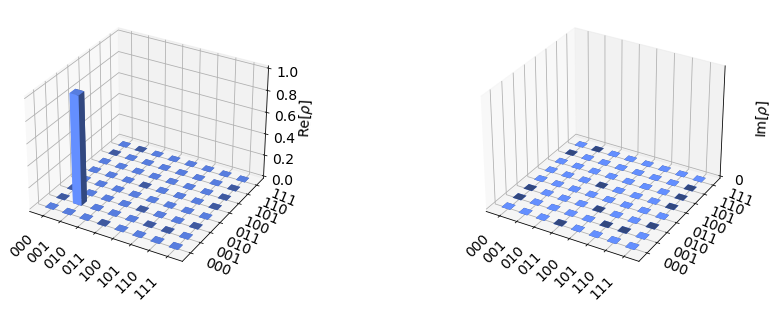

In [181]:
plot_state_city(statevec)

Choice C. is yet another type of representation that we encountered above, showing the Bloch sphere for each of the qubit of the system.

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


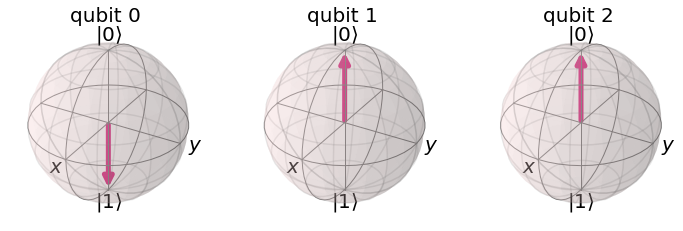

In [182]:
plot_bloch_multivector(statevec)

D.'s visualization has not yet pop up in our questions. According to `qiskit.visualization.plot_state_hinton`'s __[docs](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_hinton.html)__ it is defined as 


```
    plot_state_hinton(state, title='', figsize=None, ax_real=None, ax_imag=None, *, rho=None, filename=None)
```

and its behavior is

```
    Plot a hinton diagram for the density matrix of a quantum state.

    The hinton diagram represents the values of a matrix using squares, whose size indicate the magnitude of their corresponding value and their color, its sign. A white square means the value is positive and a black one means negative.
```

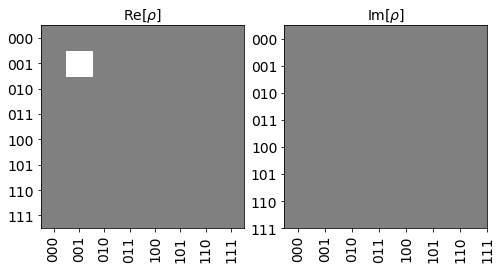

In [183]:
plot_state_hinton(statevec)

---
---

### 28. Which command displays the version of Qiskit in use, along with  other information on the system?

__Note__

This is yet one other case where choices are missing.

---

The functionality that is aked in this question is only available on Jupyter notebooks, and it takes the form of one of its commands; particularly, it is part of the `qiskit.tools.jupyter` module, and is invoked with the `%qiskit_version_table` command:

In [178]:
import qiskit.tools.jupyter
%qiskit_version_table

c:\Python38\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


---
---